# Unsupervised Learning with the K-Means Clustering Algorithm

In [39]:
from statistics import mean 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from random import randrange
import math

X, y = make_blobs(n_samples=500, centers=3, n_features=2,
                  random_state=0)


# Visualizing our data

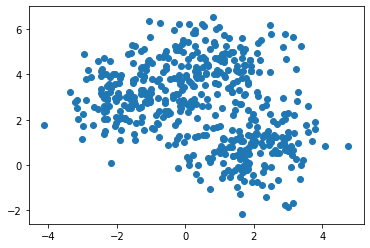

In [17]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# For this example, we will try and find 3 different clusters in our data

# Random Initialization of 3 cluster centroids

We will take 3 random examples from our training data X and assign them as the cluster centroids

In [18]:
c1 = X[randrange(500),:]
c2 = X[randrange(500),:]
c3 = X[randrange(500),:]

# Visualize random cluster centroids on data

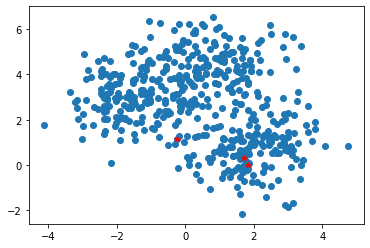

In [19]:
plt.scatter(X[:,0],X[:,1])
plt.plot(c1[0],c1[1],'r*')
plt.plot(c2[0],c2[1],'r*')
plt.plot(c3[0],c3[1],'r*')
plt.show()

The red stars on the graph represent where our cluster centroids are

# Assign each training example to the closest cluster centroid

In [25]:
def distance(c, x):
    return math.hypot(x[0] - c[0], x[1] - c[1])

labels = []

for ex in X:
    distC1 = distance(c1,ex)
    distC2 = distance(c2,ex)
    distC3 = distance(c3,ex)
    if distC1 < distC2 and distC1 < distC3:
        labels.append(1)
    elif distC2 < distC1 and distC2 < distC3:
        labels.append(2)
    elif distC3 < distC1 and distC3 < distC2:
        labels.append(3)

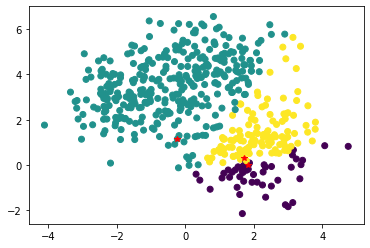

In [26]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.plot(c1[0],c1[1],'r*')
plt.plot(c2[0],c2[1],'r*')
plt.plot(c3[0],c3[1],'r*')
plt.show()

# Move cluster centroid to the middle of the respective cluster

In [27]:
df = pd.DataFrame(X)
df.columns = ['x1','x2']
df['label'] = labels

In [40]:
# GET AVERAGE POINT FROM ALL LABEL 1
df1 = df.loc[df['label']==1]
df1 = df1.iloc[:,0:2]
avex1 = mean(df1['x1'])
avey1 = mean(df1['x2'])
c1 = [avex1, avey1]

df2 = df.loc[df['label']==2]
df2 = df2.iloc[:,0:2]
avex2 = mean(df2['x1'])
avey2 = mean(df2['x2'])
c2 = [avex2, avey2]

df3 = df.loc[df['label']==3]
df3 = df3.iloc[:,0:2]
avex3 = mean(df3['x1'])
avey3 = mean(df3['x2'])
c3 = [avex3, avey3]


# After 1 iteration of k-means clustering:

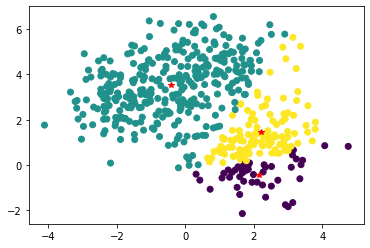

In [41]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.plot(c1[0],c1[1],'r*')
plt.plot(c2[0],c2[1],'r*')
plt.plot(c3[0],c3[1],'r*')
plt.show()

# Now, repeat the steps of assigning each training example to the closest cluster centroid and then moving the cluster centroid to the middle of the respective cluster

We are going to run through 100 iterations of K-Means

In [42]:
iterations = 100

for i in range(iterations):
    labels = []
    for ex in X:
        distC1 = distance(c1,ex)
        distC2 = distance(c2,ex)
        distC3 = distance(c3,ex)
        if distC1 < distC2 and distC1 < distC3:
            labels.append(1)
        elif distC2 < distC1 and distC2 < distC3:
            labels.append(2)
        elif distC3 < distC1 and distC3 < distC2:
            labels.append(3)
            
    df['label'] = labels
    df1 = df.loc[df['label']==1]
    df1 = df1.iloc[:,0:2]
    avex1 = mean(df1['x1'])
    avey1 = mean(df1['x2'])
    c1 = [avex1, avey1]

    df2 = df.loc[df['label']==2]
    df2 = df2.iloc[:,0:2]
    avex2 = mean(df2['x1'])
    avey2 = mean(df2['x2'])
    c2 = [avex2, avey2]

    df3 = df.loc[df['label']==3]
    df3 = df3.iloc[:,0:2]
    avex3 = mean(df3['x1'])
    avey3 = mean(df3['x2'])
    c3 = [avex3, avey3]
    
    if i % 9 == 0:
        print(i/iterations)
        

0.0
0.09
0.18
0.27
0.36
0.45
0.54
0.63
0.72
0.81
0.9
0.99


# Visualize results of K-Means clustering after 100 iterations of training

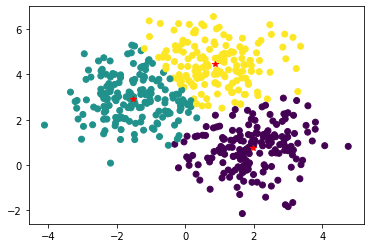

In [43]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.plot(c1[0],c1[1],'r*')
plt.plot(c2[0],c2[1],'r*')
plt.plot(c3[0],c3[1],'r*')
plt.show()

# As seen, our unsupervised Learning Algorithm has identified 3 clusters in our data